# Import needed module

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Read csv file

In [3]:
#Read csv file by implementing pandas
df = pd.read_csv(r'C:\Users\user\Documents\WIA1006 Machine Learning\(A) machine learning model\Suicide_Detection_2.csv',encoding='latin1')

#Display the top 10 rows of the dataset
df.head(10)


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I canât do it anymore. \nI q...,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


# Implement Lambda 

In [4]:
#Sentiments column is read 
#Create a new column (class)
#Class column is inserted with value of 0 or 1 by using lambda
#0 is represent suicide and 1 is represent non-suicide in sentiments column

df['sentiments'] = df['class'].apply(lambda x: 1 if x in ['suicide'] else 0)

In [5]:
df.head(10)

,Unnamed: 0,text,class,sentiments
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide,1
5,11,Honetly idkI dont know what im even doing here...,suicide,1
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide,1
7,13,It ends tonight.I canât do it anymore. \nI q...,suicide,1
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,0
9,18,My life is over at 20 years oldHello all. I am...,suicide,1


# Removing stop words with NLTK 

In [6]:
##############################################
## Making labels array ##

labels = []

for label in df['sentiments']:
  labels.append(label)

# print(labels)

In [7]:
############################################
## Making corresponding text array ##

tempText = []

for msg in df['text']:
  tempText.append(msg)

#print(temp1)

In [8]:
###############################################
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [9]:
############################################################

### Removing stopwords and punctuations ###
stop_words = set(stopwords.words('english')) 

text = []

for i, msg in enumerate(tempText):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    text.append(listToString(filtered_sentence))

print(text[0:1])

['Ex Wife Threatening SuicideRecently I left wife good cheated twice lied much I decided refuse go back As days ago began threatening suicide I tirelessly spent paat days talking keeps hesitating wants believe I come back I know lot people threaten order get way happens really What I I supposed handle death hands I still love wife I cannot deal getting cheated constantly feeling insecure I worried today may day I hope much happen']


# Plotting Histogram

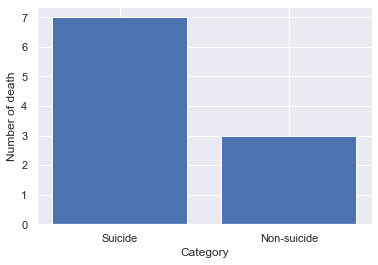

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#We take top 10 rows to plot our bar chart due to the dataset too large
sns.set()
x = ['Suicide','Non-suicide']
y = [7,3]
plt.bar(x, y)
plt.xlabel('Category')
plt.ylabel('Number of death')
plt.show()

# Implement tokenizer 

In [11]:
tokenizer = Tokenizer(oov_token="<OOV>")

In [12]:
#Split the dataset into training set & test set
#Training set (80%)
#Test set (10%)
#Validation set (10%)

split = round(len(df)*0.8)

split_2 = round(len(df)*0.9)

train_text = text[:split]     

train_label = labels[:split]

test_text = text[split:split_2] 

test_label = labels[split:split_2]

validation_text = text[split_2:]

validation_label = labels[split_2:]

# Initiate lists

In [13]:
#Assign the sentiment into different list

import numpy as np
training_sentences = []

training_labels = []

testing_sentences = []

testing_labels = []

validation_sentences = []

validation_labels = []

for row in train_text:
    training_sentences.append(str(row))
    
for row in train_label:
    training_labels.append(row)
    
for row in test_text:
    testing_sentences.append(str(row))
    
for row in test_label:
    testing_labels.append(row)
    
for row in validation_text:
    validation_sentences.append(str(row))
    
for row in validation_label:
    validation_labels.append(row)

# Tokenization

In [14]:
vocab_size = 40000

embedding_dim = 16

max_length = 120

trunc_type = 'post'

oov_tok = '<OOV>'

padding_type = 'post'

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Save Tokenizer

In [81]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
#Convert the training_sentences into sequence
sequences = tokenizer.texts_to_sequences(training_sentences)

#Pad the sequences
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

#Convert the testing_sentences into sequence
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)

#Pad the testing_sentences
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

#Convert the validation_sentences into sequence
validation_sentences = tokenizer.texts_to_sequences(validation_sentences)

#Pad the validation_sentences
validation_padded = pad_sequences(validation_sentences, maxlen=max_length)

# Create model

In [26]:
#Using keras in Tensorflow to create our model
#We set 8 hidden layers and 1 output layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#Display summary of the model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 640,145
Trainable params: 640,145
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Assign the elements training_labels & testing_labels into training_labels_final & testing_labels_final

training_labels_final = np.array(training_labels)

testing_labels_final = np.array(testing_labels)

validation_labels_final = np.array(validation_labels)

# Training model

In [30]:
#Set the number of epoch as 6
#We choose 6 instead of higher number to prevent overfitting

num_epochs = 6
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(validation_padded, validation_labels_final))

Epoch 1/6
5802/5802 [==============================] - 49s 8ms/step - loss: 0.2390 - accuracy: 0.9063 - val_loss: 0.1781 - val_accuracy: 0.9341
Epoch 2/6
5802/5802 [==============================] - 43s 7ms/step - loss: 0.1613 - accuracy: 0.9406 - val_loss: 0.1702 - val_accuracy: 0.9352
Epoch 3/6
5802/5802 [==============================] - 45s 8ms/step - loss: 0.1446 - accuracy: 0.9471 - val_loss: 0.1696 - val_accuracy: 0.9372
Epoch 4/6
5802/5802 [==============================] - 43s 7ms/step - loss: 0.1334 - accuracy: 0.9506 - val_loss: 0.1659 - val_accuracy: 0.9376
Epoch 5/6
5802/5802 [==============================] - 49s 8ms/step - loss: 0.1247 - accuracy: 0.9535 - val_loss: 0.1683 - val_accuracy: 0.9368
Epoch 6/6
5802/5802 [==============================] - 48s 8ms/step - loss: 0.1167 - accuracy: 0.9556 - val_loss: 0.1705 - val_accuracy: 0.9376


# Model Accuracy and Model Loss

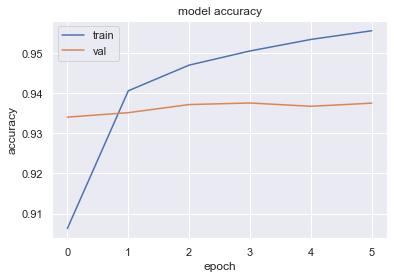

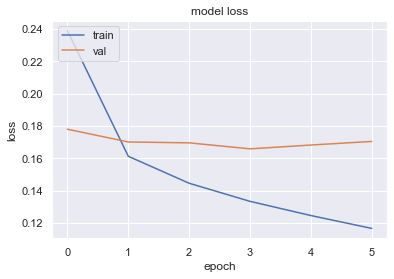

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate model

In [32]:
#Evaluate the model using testing_padded & testing_labels_final

model.evaluate(testing_padded, testing_labels_final)

726/726 [==============================] - 1s 1ms/step - loss: 0.1690 - accuracy: 0.9383


[0.16902470588684082, 0.9383295774459839]

# Plotting graph

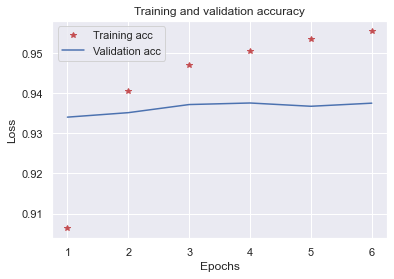

In [33]:
# import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#Display the graph
plt.show()

# Model Prediction

In [34]:
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Sample sentence")
print(decode_review(testing_padded[35]))

predictions = model.predict(testing_padded)  

#Convert the float into integers
prediction = [None] * len(predictions)
i = 0
j = 0
for x in range(len(predictions)):
    for y in range(len(predictions[x])):
        if predictions[x][y] < 0.5:
            prediction[i] = 0
        else:
            prediction[i] = 1
        i += 1
       

# predictionsTrain = model.predict(padded)
print("Predicted Probability: ", predictions[35])

Sample sentence
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> fathers much one i fall stopped one got right something hes hard sure like they near cut work spoke
726/726 [==============================] - 1s 1ms/step
Predicted Probability:  [0.9710431]


# Save model

In [92]:
#Save model into model_depressed.h5
model.save("model_depressed_2.h5")

# Load saved model

In [35]:
# import tensorflow as tf
new_model = tf.keras.models.load_model("model_depressed_2.h5")

#Evaluate the saved model
new_model.evaluate(testing_padded, testing_labels_final)

726/726 [==============================] - 1s 1ms/step - loss: 0.1702 - accuracy: 0.9385


[0.1701848953962326, 0.9385019540786743]

# Saved model prediction

In [36]:
#Predict the outcome (probability) using the testing set (testing_padded)

new_predictions = new_model.predict(testing_padded)
print("Predicted Probability: ", new_predictions[35])


726/726 [==============================] - 1s 1ms/step
Predicted Probability:  [0.97395307]


# Confusion Matrix

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

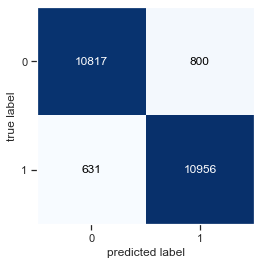

In [50]:
#import module mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_label,prediction)
plot_confusion_matrix(conf_mat = mat)

# Evaluation Metrics

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, log_loss  

print('------------Evaluation Metrics------------')

print('Accuracy    : %.4f' % accuracy_score(test_label,prediction))
print()

print('Precision   : %.4f' % precision_score(test_label,prediction))
print()

print('Recall      : %.4f' % recall_score(test_label,prediction))
print()

print('F1 Score    : %.4f' % f1_score(test_label,prediction))
print()

print('auc_score   : %.4f' % roc_auc_score(test_label,prediction))
print()

print('Log Loss    : %.4f' % log_loss(test_label,prediction))

------------Evaluation Metrics------------
Accuracy    : 0.9383

Precision   : 0.9319

Recall      : 0.9455

F1 Score    : 0.9387

auc_score   : 0.9383

Log Loss    : 2.1300


# Input random text for prediction

In [39]:
#Initiate sentences list by assigned some sentences

sentences = [
    "i am so sad today, i m going to die",
    "Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.",
    "Guys I want friends Thatâ€™s it , Iâ€™m alone and donâ€™t talk to anyone dm me or anything, Iâ€™m just tired of only talking to my dad and sister, literally only my dad and sister , I like animated series but Iâ€™m flexible to anything the last series I watch was Santa Claritaâ€™s diet and the last animated series I watch was the hollow and shera ( I was watching them at the same time ), and I have a very extended music repertoire I can draw you anything you ask ( or at least Iâ€™ll try ) you can text me at any hour of the day , I pretty much only do that , I have weird family anecdotes and stories I can tell you  , but if you are not interested in anything I mentioned it doesnâ€™t matter Iâ€™m just here to be a friend"
]

#Tokennize the sentences list and convert it into sequences

new_sentences = tokenizer.texts_to_sequences(sentences)

new_padded = pad_sequences(new_sentences, maxlen=max_length)

#Predict the outcome (probability) by using new_padded
new_model.predict(new_padded)

1/1 [==============================] - 0s 22ms/step


array([[0.31097168],
       [0.88538426],
       [0.03178994]], dtype=float32)